# Run the whole deltas algorithm

In [4]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import SSL

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [5]:
N1 = 10000
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


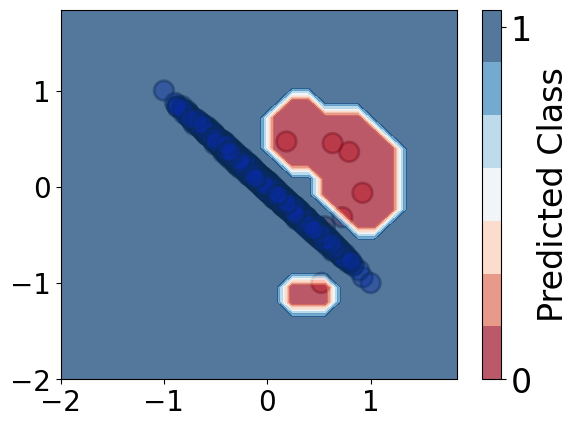

SMOTE


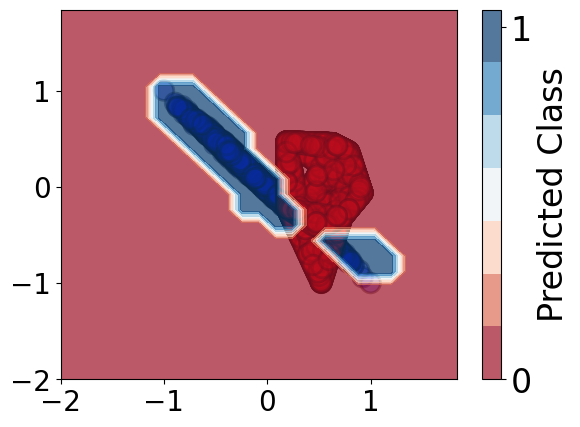

In [6]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


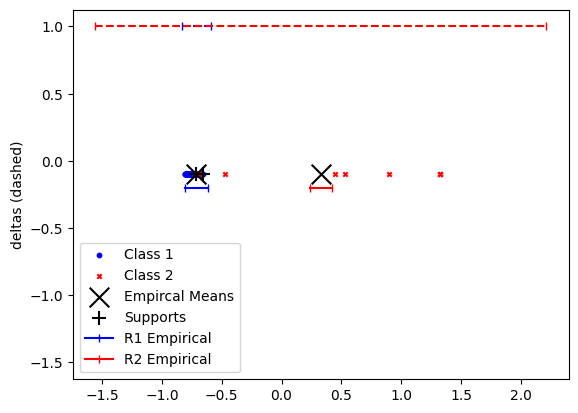

Unable to find result with SSL, increase the max_trials


In [7]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = SSL.SSL_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [8]:
deltas_model.print_params()
deltas_model.print_deltas()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
original accuracy: 0.74265
SMOTE accuracy: 0.897
deltas accuracy: 0.74265

original F1: 0.6534706793240422
SMOTE F1: 0.8950799633289193
deltas F1: 0.6534706793240422

original precision0: 0.6601967386281111
SMOTE precision0: 0.8829828284777156
deltas precision0: 0.6601967386281111

original precision1: 1.0
SMOTE precision1: 0.9120822088436786
deltas precision1: 1.0

original


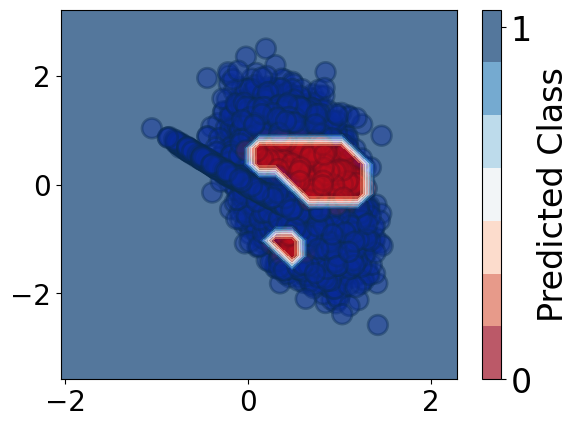

SMOTE


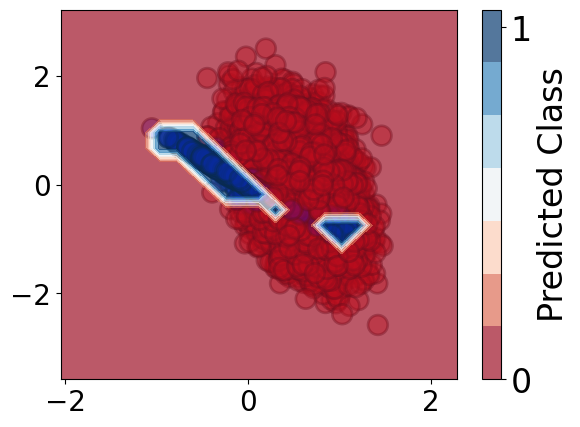

deltas
Not fit to any data yet, call 'fit(X, y)' or  method first


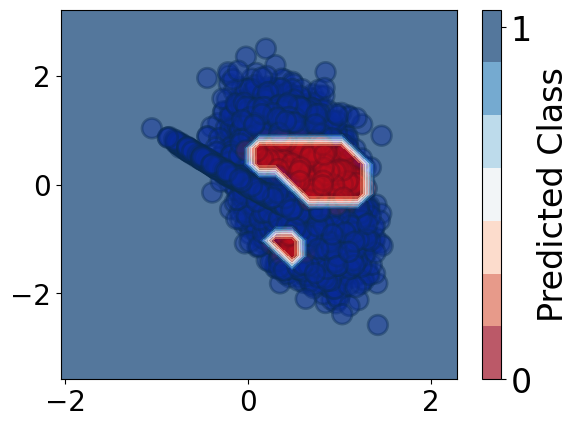

Not fit to any data yet, call 'fit(X, y)' or  method first
Not fit to any data yet, call 'fit(X, y)' or  method first
Not fit to any data yet, call 'fit(X, y)' or  method first


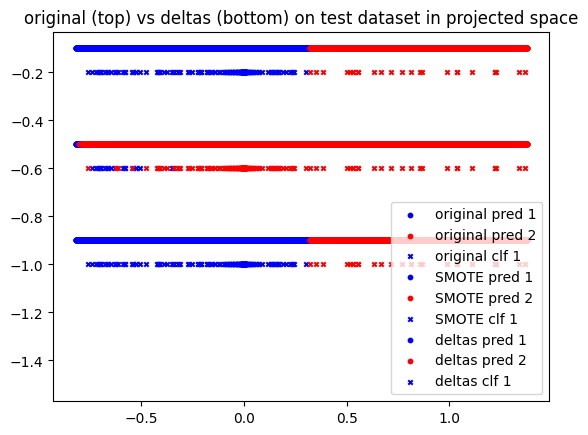

In [10]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)